# Import libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Load Data From CSV File

In [24]:
df = pd.read_csv('Round1_Problem2-of-3_Dataset.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [25]:
df= df.dropna()

In [26]:
X1 = df.copy()

In [27]:
del X1['Customer']

In [28]:
del X1['Effective To Date']

In [29]:
X1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
X1.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [31]:
X4 = pd.get_dummies(X1)

In [32]:
X4.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Response_No', 'Response_Yes', 'Coverage_Basic',
       'Coverage_Extended', 'Coverage_Premium', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special 

In [33]:
X4

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,8804.584902,38638.0,74.0,5.0,84.0,0.0,2.0,355.200000,0,0,...,0,1,0,0,0,0,0,0,1,0
8289,2438.689804,80927.0,62.0,25.0,8.0,0.0,1.0,211.660971,0,1,...,0,0,0,0,0,0,1,0,1,0
8290,4736.347990,0.0,65.0,33.0,1.0,0.0,3.0,585.454243,0,1,...,1,0,0,0,0,0,1,0,1,0
8291,5608.155723,81914.0,70.0,6.0,33.0,0.0,6.0,198.754660,1,0,...,0,1,0,0,0,0,0,0,1,0


## Setting up K-Means

In [10]:
from sklearn.cluster import k_means
n = 10
cif = k_means(X4, n_clusters = n)
centroids = cif[0]
labels = cif[1]

In [11]:
centroids

array([[ 6.44235048e+03,  1.89779389e+04,  9.18971061e+01,
         1.55862808e+01,  4.69539121e+01,  3.65487674e-01,
         3.05251876e+00,  4.62245120e+02,  2.22936763e-01,
         2.99035370e-01,  9.64630225e-02,  2.94748124e-01,
         8.68167203e-02,  7.49196141e-01,  2.50803859e-01,
         5.81993569e-01,  3.37620579e-01,  8.03858521e-02,
         3.07609861e-01,  3.04394427e-01,  4.28724544e-02,
         2.61521972e-01,  8.36012862e-02,  2.73311897e-01,
         2.62593783e-01,  2.86173633e-01,  1.77920686e-01,
         2.72004641e-15,  5.40192926e-01,  4.59807074e-01,
         8.46730975e-02,  8.24222937e-01,  9.11039657e-02,
         2.29367631e-01,  6.17363344e-01,  1.53269025e-01,
         2.06859593e-01,  7.49196141e-01,  4.39442658e-02,
         3.75133976e-02,  5.89496249e-02,  1.10396570e-01,
         1.38263666e-01,  2.39013934e-01,  3.71918542e-01,
         1.39335477e-02,  1.60771704e-02,  1.39335477e-02,
         4.57663451e-01,  2.94748124e-01,  1.41479100e-0

In [12]:
labels

array([6, 3, 2, ..., 3, 1, 3])

In [35]:
from sklearn.preprocessing import StandardScaler
X4 = StandardScaler().fit_transform(X4)
X4

array([[-0.76387311,  0.60827787, -0.70121983, ..., -0.3410293 ,
         0.65204215, -0.4908256 ],
       [-0.14746886, -1.24331778,  0.02350077, ..., -0.3410293 ,
         0.65204215, -0.4908256 ],
       [ 0.7162972 ,  0.36127342,  0.4293443 , ..., -0.3410293 ,
         0.65204215, -0.4908256 ],
       ...,
       [-0.47543497, -1.24331778, -0.81717512, ..., -0.3410293 ,
         0.65204215, -0.4908256 ],
       [-0.347972  ,  1.45191637, -0.672231  , ..., -0.3410293 ,
         0.65204215, -0.4908256 ],
       [-0.22266406, -1.24331778, -0.03447688, ..., -0.3410293 ,
         0.65204215, -0.4908256 ]])

## Using the elbow method to find the optimal number of clusters

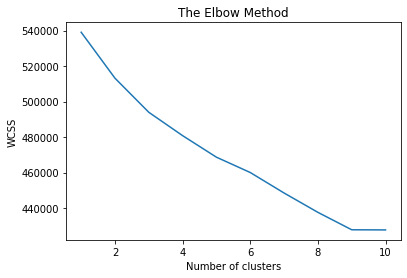

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X4)
y_kmeans

array([7, 6, 1, ..., 6, 7, 6])

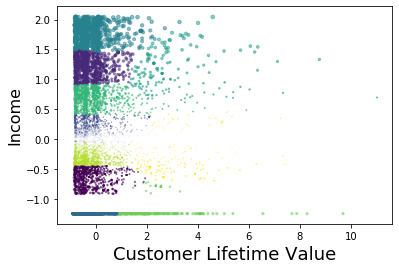

In [36]:
area = np.pi * ( X4[:, 1])**2  
plt.scatter(X4[:, 0], X4[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Customer Lifetime Value', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

### Creating the Visual Plot

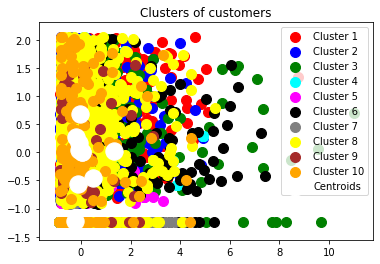

In [39]:
plt.scatter(X4[y_kmeans == 0, 0], X4[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X4[y_kmeans == 1, 0], X4[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X4[y_kmeans == 2, 0], X4[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X4[y_kmeans == 3, 0], X4[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X4[y_kmeans == 4, 0], X4[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X4[y_kmeans == 5, 0], X4[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(X4[y_kmeans == 6, 0], X4[y_kmeans == 6, 1], s = 100, c = 'gray', label = 'Cluster 7')
plt.scatter(X4[y_kmeans == 7, 0], X4[y_kmeans == 7, 1], s = 100, c = 'yellow', label = 'Cluster 8')
plt.scatter(X4[y_kmeans == 8, 0], X4[y_kmeans == 8, 1], s = 100, c = 'brown', label = 'Cluster 9')
plt.scatter(X4[y_kmeans == 9, 0], X4[y_kmeans == 9, 1], s = 100, c = 'orange', label = 'Cluster 10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'white', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()